Question 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from time import sleep
from IPython import display

df = pd.read_csv('digits.csv')

part 1

In [ ]:
#save rows 201 and 202
row_num_201 = df.loc[200]
row_num_202 = df.loc[201]

#delete rows 201 and 202
df = df.drop(200)
df = df.drop(201)

part 2

In [ ]:
threshold = 128

for i in range(1, len(df.columns)):
    df.iloc[:, i] = df.iloc[:, i].apply(lambda x: 1 if x > threshold else 0)

part 3

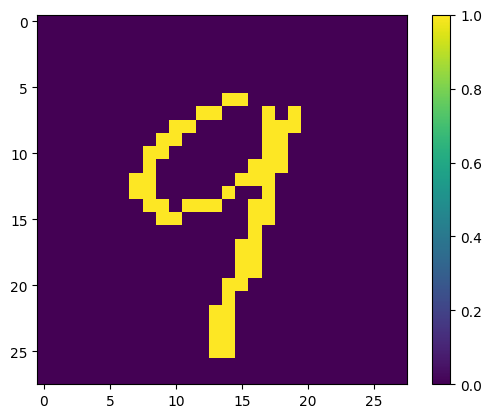

In [ ]:
#seperating a special row
special_row_index = 119
special_row_data = df.iloc[special_row_index,1 :]

#converting it to a 2 dimentional array
array_2d = np.array(special_row_data).reshape(28, 28)

#show it using matplotlib.pyplot.imshow
plt.imshow(array_2d, cmap='viridis')
plt.colorbar()
plt.show()

part 4

برای احتمال روشن بودن آن عدد 0.67 را بیان می کنیم

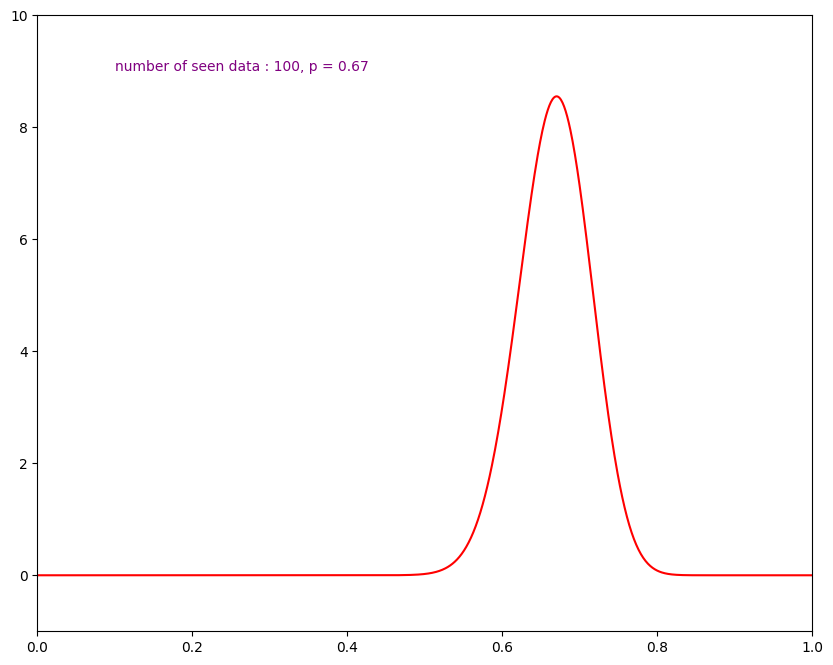

<Figure size 1000x800 with 0 Axes>

In [ ]:
t = 1000
p = np.linspace(0,1,t)
fy = stats.beta.pdf(p, a=1, b=1)

def update(fy: np.array, n:bool) -> np.array:
    pny = stats.bernoulli.pmf(n, p)
    integral = np.sum(fy * pny) / t
    post = fy * pny / integral
    return post

plt.figure(figsize=(10,8))
for i in range(100):
    # replace 'df' with your dataframe's name, this is just a suggestion, you do not have to code exactly like this
    n =  df[df['label'] == 8].iloc[i, df.columns.get_loc('pixel404')]
    fy = update(fy, n)

    # dynamic plot
    # do not change this part
    plt.plot(p, fy, 'r', label='1')
    plt.ylim(-1, 10)
    plt.xlim(0, 1)
    plt.text(0.1,9,f'number of seen data : {i + 1}, p = {fy.argmax() / t :.2f}', color='purple')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    sleep(0.05)